# Hertz experimento


![imagen](img_mont/circuit.png)

- $V_{G1K} = 1.5 [V]$ es el voltaje entre el filamento y la grilla 1 usada para incitar a los electrones a moverse en cierta dirección
- $K=1.9[V]$ el voltaje del filamento, asegurese de leer el limite dado por el fabricante para su lampara
- $V_{G2K} = V[V]$ es el voltaje variado en el experimento, corresponde a la aceleración, a la energia que le entregamos
- $V_{G2A}$ es el voltaje retardante, corresponde a un filtrado, de manera que los electrones que pierden energia al reaccionar con el argón no lleguen hasta el punto A a ser registrados como corriente
- $A$ corresponde al amperimetro, donde registramos la llegada del electron mediante corriente


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

df1 = pd.read_excel("DataHertz.xlsx", sheet_name="Sheet2")
df1

,VG2A [V],VG2K [V],IA [E-10 A],Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,5,6.4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,7.0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,8.0,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,9.0,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,10.0,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,5,75.0,389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,5,76.0,391,NaN,NaN,NaN,NaN,multiplos,NaN,NaN,NaN,NaN,Promedio
59,5,78.0,359,NaN,NaN,NaN,n=1,12,12.0,11.5,11.5,11.5,11.7
60,5,79.0,326,NaN,NaN,NaN,n=2,23.5,23.0,23.0,NaN,NaN,11.583333


In [3]:
# notese que aqui estan las unidades
df1 = df1[['VG2K [V]','IA [E-10 A]']]
df1 =df1.rename(columns={'VG2K [V]':'V','IA [E-10 A]':'I'})
# df1.to_csv('hertz_processed.csv')
df1

,V,I
0,6.4,0
1,7.0,13
2,8.0,63
3,9.0,100
4,10.0,118
...,...,...
57,75.0,389
58,76.0,391
59,78.0,359
60,79.0,326


In [46]:
# espaciado entre datos, la mitad de eso sera la incertidumbre del voltaje
np.mean(df1.V - df1.V.shift(1, fill_value=0)) / 2


0.6451612903225806

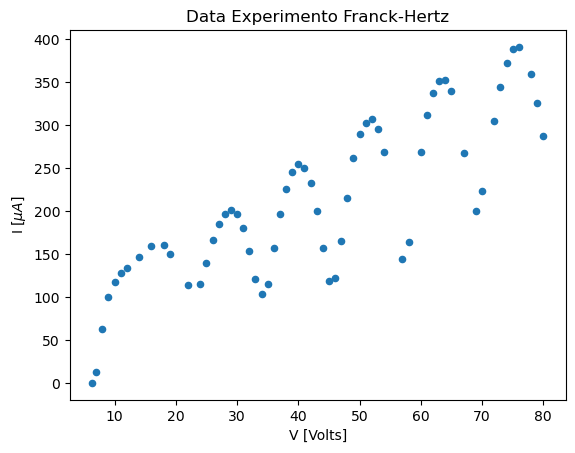

In [4]:
df1.plot(kind='scatter', y='I', x='V')
plt.xlabel('V [Volts]')
plt.ylabel(r'I [$\mu A$]')
plt.title('Data Experimento Franck-Hertz')
plt.savefig('plots/data_hertz.png', dpi=300)
plt.show()

In [5]:
df1['minV'] = df1.V[(df1.I.shift(1) >= df1.I) & (df1.I.shift(-1) >= df1.I)]
df1['maxV'] = df1.V[(df1.I.shift(1) < df1.I) & (df1.I.shift(-1) < df1.I)]

df1

,V,I,minV,maxV
0,6.4,0,NaN,NaN
1,7.0,13,NaN,NaN
2,8.0,63,NaN,NaN
3,9.0,100,NaN,NaN
4,10.0,118,NaN,NaN
...,...,...,...,...
57,75.0,389,NaN,NaN
58,76.0,391,NaN,76.0
59,78.0,359,NaN,NaN
60,79.0,326,NaN,NaN


In [6]:
minV = df1['minV'].dropna()
minI = df1.I[df1['V'].isin( minV )]

print( list(zip(minV, minI)) )

maxV = df1['maxV'].dropna()
maxI = df1.I[df1['V'].isin( maxV )]

print( list(zip(maxV, maxI)) )

[(22.0, 114), (34.0, 103), (45.0, 119), (57.0, 144), (69.0, 200)]
[(18.0, 160), (29.0, 201), (40.0, 255), (52.0, 307), (64.0, 352), (76.0, 391)]


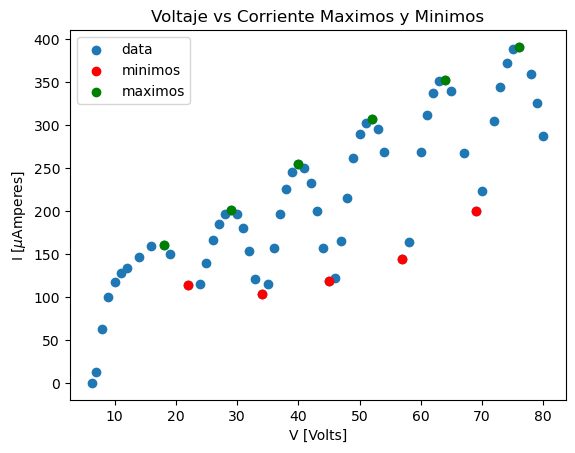

In [7]:
plt.title('Voltaje vs Corriente Maximos y Minimos')
plt.scatter(data=df1, y='I', x='V', label='data')
plt.scatter(minV  , minI, c='r',label='minimos')
plt.scatter(maxV, maxI, c='g',label='maximos')
plt.xlabel('V [Volts]')
plt.ylabel(r'I [$\mu$Amperes]')
plt.legend()
plt.savefig('plots/voltaje_vs_corriente_hertz.png',dpi=300)
plt.show()

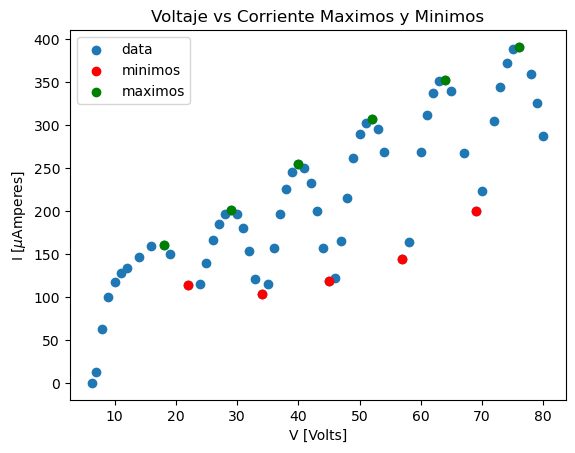

In [8]:
plt.title('Voltaje vs Corriente Maximos y Minimos')
plt.scatter(data=df1, y='I', x='V', label='data')
plt.scatter(minV  , minI, c='r',label='minimos')
plt.scatter(maxV, maxI, c='g',label='maximos')
plt.xlabel('V [Volts]')
plt.ylabel(r'I [$\mu$Amperes]')
plt.legend()
plt.savefig('plots/voltaje_vs_corriente_hertz.png',dpi=300)
plt.show()

### los puntos de importancia
Los voltajes medidos son los voltajes de aceleración $V_{G2K}$

cuando los electrones alcanzan una energia $e V_0$ entonces pueden transmitir su energia cinetica a una exitación discreta del atomo de la lampara; luego esa energia se vuelve a presentar en multiplos $n e V_0$


- elijase los minimos o maximos
- tomesé la diferencia de voltaje entre los puntos
- la diferencia de voltaje

#### diferencias fijas de drops
demostrar que hay diferencias fijas entre los peaks, demuestra que el argón tiene niveles de exitacion que absorben energia en cantidades cuantizadas

In [9]:
# la energia base e V0
maxV 

9     18.0
17    29.0
28    40.0
40    52.0
49    64.0
58    76.0
Name: maxV, dtype: float64

In [10]:
# 29-18, 40-29, 52-40, ...
DeltaVmax = maxV[1::].values - maxV[:-1:].values
DeltaVmax

array([11., 11., 12., 12., 12.])

In [11]:
# mientras que para los minimos
DeltaVmin = minV[1::].values - minV[:-1:].values
DeltaVmin

array([12., 11., 12., 12.])

In [27]:
V0_series = np.append(DeltaVmax, DeltaVmin)
# todas las mediciones de la energia base:
V0DataFrame = pd.DataFrame({'V_0': V0_series})
# V0DataFrame.to_csv('V0.csv')

graficando la solucion

In [29]:
import seaborn as sns

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

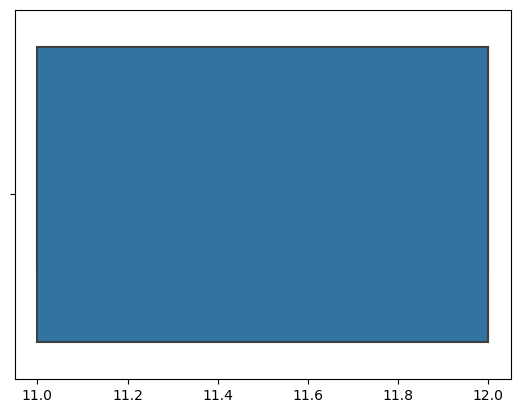

In [30]:
# boxplot

sns.boxplot(V0_series)

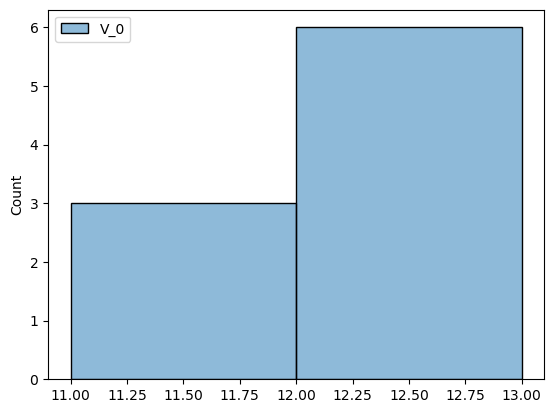

Signature:
sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None,
)
Docstring:
Set aspects of the visual theme for all matplotlib and seaborn plots.

This function changes the global defaults for all plots using the
:ref:`matplotlib rcParams system <matplotlib:matplotlib-rcparams>`.
The themeing is decomposed into several distinct sets of parameter values.

The options are illustrated in the :doc:`aesthetics <../tutorial/aesthetics>`
and :doc:`color palette <../tutorial/color_palettes>` tutorials.

Parameters
----------
context : string or dict
    Scaling parameters, see :func:`plotting_context`.
style : string or dict
    Axes style parameters, see :func:`axes_style`.
palette : string or sequence
    Color palette, see :func:`color_palette`.
font : string
    Font family, see matplotlib font manager.
font_scale : float, optional
    Separate scaling factor to independently scale the 

In [38]:
sns.histplot(V0DataFrame, binwidth=0.9999) # trucazo

In [14]:
# estimador 
V0 = np.mean(V0_series)
print(V0)

11.666666666666666


La linea de emisión para la ampolleta es de
$$
\lambda = 108.1 \times 10^{-9} [m]
$$

entonces ocurre que:
$$
E = e V_0 = h f = h c / \lambda
$$

por tanto podemos despejar la constante de placnk y la velocidad de la luz
$$
hc = \lambda e V_0
$$

In [15]:
# primero encontramos hc

wavelength = 108.1 # 10^-9 [m]
#c = 3 # 10^8 [m/s]
e = 1.602176634 # 10^-19 [J/V]

#stimador
V0 # [V]


hc = wavelength * e  * V0  # 10^(-9-19) = 10^-28[J m]
 
hc = hc / 1000  # 10^{-25} [Jm]
hc

# el valor moderno es de 1.9845586 * 10^{-25} [Jm]

2.0206117649129998

In [56]:
h = wavelength * epsilonV0 / c
h * 10**(-17) # 10^{-17}

1.8016666666666668e-16

In [16]:
hcmodern =  1.9845586 
100*(hc - hcmodern)/hcmodern
# error de 1.81%

1.8166843202815888

In [55]:
wavelength = 108.1 # 10^-9 [m]
c = 3 # 10^8 [m/s]
e = 1.602176634 # 10^-19 [J/V]

#stimador
V0 # [V]
epsilonV0 = 0.5

# h = wavelength * e  * V0 / c # 10^-36 [J s]
h = wavelength * e  * epsilonV0 / c # 10^-36 [J s]
h = h / 100 # 10^{-34} [Js]
h

# modern value of h = 6.62607 10^{-34} [Js]



0.18016666666666667

In [18]:
realh = 6.62607015

100*(h - realh)/realh
# 1.6 % de error

1.649581082536515

# Fast Fourier Transform
La transformada de Fourier discreta aplicada a estos datos nos entrega informacion sobre las oscilaciones presentes

In [115]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=4)

df1 = pd.read_excel("DataHertz.xlsx", sheet_name="Sheet2")
# notese que aqui estan las unidades
df1 = df1[['VG2K [V]','IA [E-10 A]']]
df1 =df1.rename(columns={'VG2K [V]':'V','IA [E-10 A]':'I'})


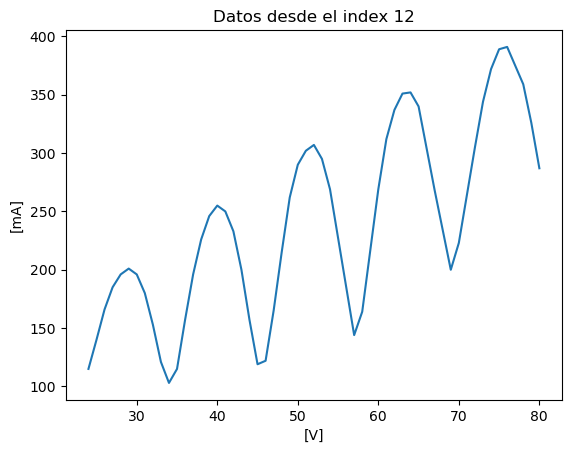

In [123]:
ignore_points = 12
plt.plot( df1[ignore_points:].V ,  df1[ignore_points:].I )
plt.title('Datos desde el index 12')
plt.xlabel('[V]')
plt.ylabel('[mA]')
plt.show()

In [124]:
x = df1[12:].V.values
y = df1[12:].I.values

In [125]:
# cual es mi intervalo de datos
print('max',np.max(x))
print('min',np.min(x))
T = np.max(x) - np.min(x)

print('T:', T)
N = len(df1)

print('sampling rate o d:', N/T)

max 80.0
min 24.0
T: 56.0
sampling rate o d: 1.1071428571428572


sampling rate: 0.8928571428571429
frecuencia nyquist (max que podemos leer): 0.44642857142857145
---
Max |ck| 237.4
max freq: 0.0


Text(0.5, 1.0, 'Espectro de Frecuencia')

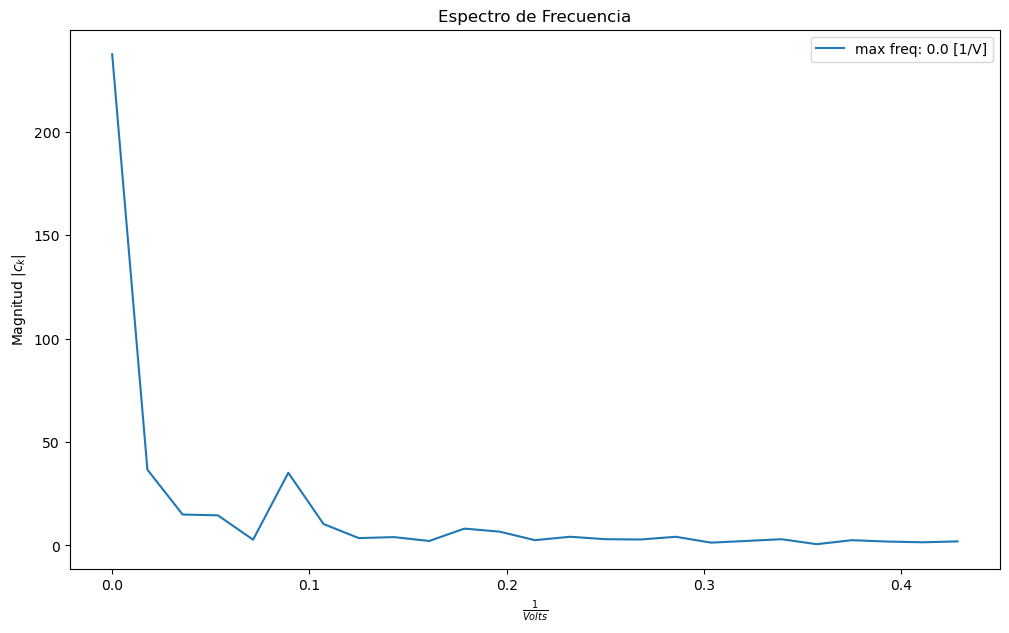

In [126]:
# datos
data = y
N = len(y) 

print('sampling rate:', N/T)
print('frecuencia nyquist (max que podemos leer):', N/2/T)

# fourier transform
ft = np.fft.fft(data)
mgft = abs(ft) / N

# luego las frecuencias
fVals = np.fft.fftfreq( len(data) ) * N / T
print('---')
print('Max |ck|',np.max(mgft))
print('max freq:', fVals[mgft.argmax()]  )

# hasta la 2da 
plt.subplots(figsize=(12,7))
plt.plot(fVals[:int(len(mgft)/2)], mgft[:int(len(mgft)/2)],
    label=f'max freq: {np.around(  fVals[mgft.argmax()]  , 4)} [1/V]'
    )
plt.xlabel(r'$\frac{1}{Volts}$')
plt.ylabel(r'Magnitud $|c_k|$')
plt.legend()
plt.title('Espectro de Frecuencia')


In [127]:
# para hallar el index del maximo
mgft[mgft.argmax()]
mgft[mgft == np.max(mgft)] # es equivalente a esto, pero sin saber el index


# ahora para obtener la frecuencia ligada a mgft maximo
fVals[mgft.argmax()]

0.0

In [128]:
len(mgft)

50

In [129]:
# para analizar los maximos
df_freq = pd.DataFrame({
    'mag': mgft[:int(len(mgft)/2)], 'freq': fVals[:int(len(mgft)/2)]
    })

In [130]:
maximos = df_freq[(df_freq.mag.shift(1) < df_freq.mag) & (df_freq.mag.shift(-1) < df_freq.mag)]
maximos

,mag,freq
5,35.125802,0.089286
8,4.027217,0.142857
10,8.130771,0.178571
13,4.188369,0.232143
16,4.180034,0.285714
19,3.005646,0.339286
21,2.536787,0.375000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Espectro de Frecuencia')

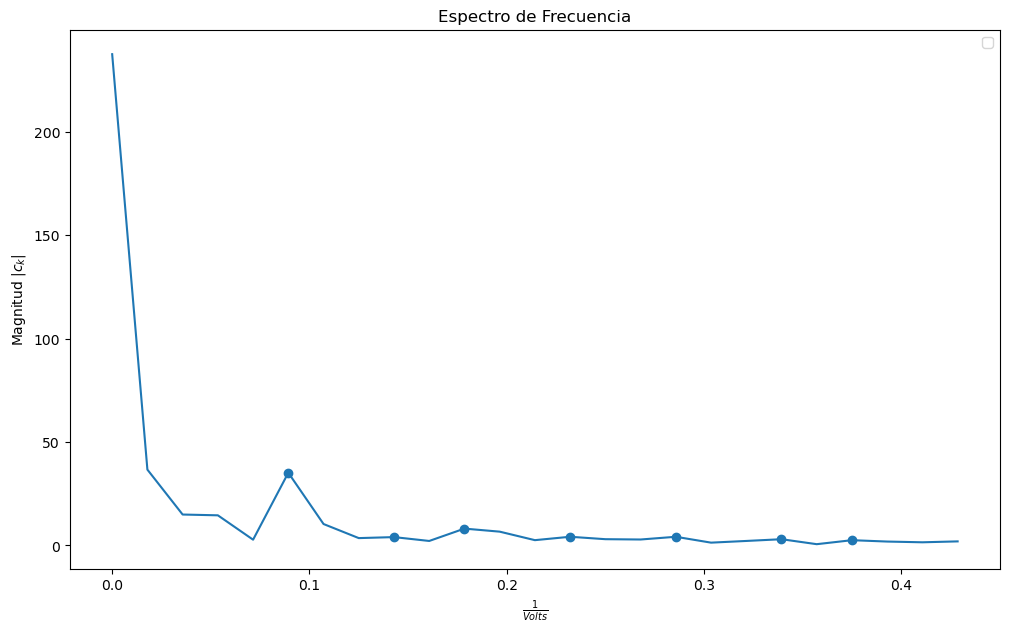

In [148]:
# hasta la 2da 
plt.subplots(figsize=(12,7))
plt.plot(
    df_freq.freq, df_freq.mag
    )
plt.scatter(
    maximos.freq, maximos.mag
    )
plt.xlabel(r'$\frac{1}{Volts}$')
plt.ylabel(r'Magnitud $|c_k|$')
plt.legend()
plt.title('Espectro de Frecuencia')

In [133]:
# el primer coeficiente crea el intercepto, donde parte la onda
200 * np.exp(0)

200.0

In [135]:
maximos.iloc[0]

mag     35.125802
freq     0.089286
Name: 5, dtype: float64

In [146]:
1/ maximos.iloc[0].freq

11.2

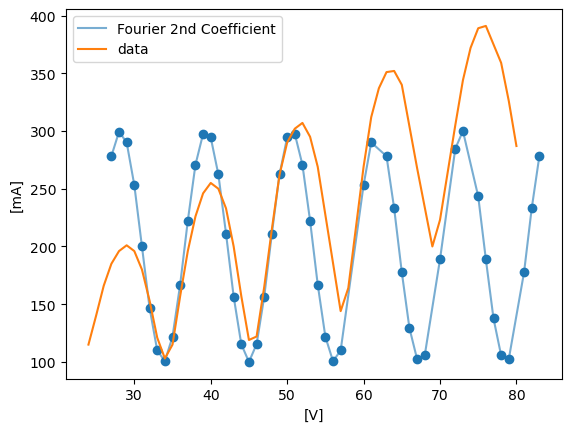

In [145]:
offset = 3
plt.scatter(x + offset,200+ 100 * np.exp(1j * 2 * np.pi * maximos.iloc[0].freq * x).imag)
plt.plot(x + offset,200+ 100 * np.exp(1j * 2 * np.pi * maximos.iloc[0].freq * x).imag, alpha=0.6, label='Fourier 2nd Coefficient')
plt.plot(x,y, label='data')
plt.xlabel('[V]')
plt.ylabel('[mA]')
plt.legend()
plt.show()

Inversa

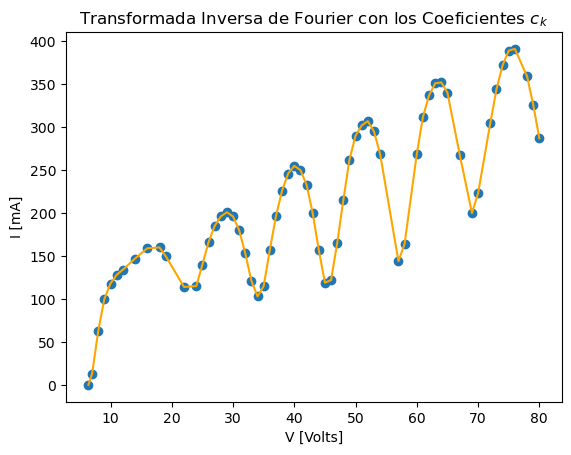

In [66]:
plt.plot( df1.V, np.fft.ifft(ck).real, label='fourier', c='Orange')
plt.scatter( df1.V, df1.I, label='data')
plt.title(r'Transformada Inversa de Fourier con los Coeficientes $c_k$ ')
plt.xlabel('V [Volts]')
plt.ylabel('I [mA]')
plt.show()